# Предварительный анализ данных

## Введение

---




**Датасет**



Набор данных о бриллиантах. Содержит следующие столбцы с  характеристиками:
- **price** цена в долларах США (\$326--\$18,823);

- **carat** вес в каратах (0.2--5.01);

- **cut** качество огранки (Fair - удовлетворительная, Good - хорошая, Very Good - очень хорошая, Premium - высшего сорта, Ideal - идеальная)

- **color** цвет от J (наихудший) до D (наилучший)

- **clarity** чистота (I1 (наихудший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучший))

- **x** длина в миллиметрах (0--10.74)

- **y** ширина в миллиметрах (0--58.9)

- **z** высота в миллиметрах (0--31.8)

- **depth** отношение **z / mean(x, y) = 2 * z / (x + y)** в процентах (43--79)

- **table** ширина огранки бриллианта, выраженная в процентах от его среднего диаметра (43--95)

![схема1](https://cdn.shopify.com/s/files/1/0461/8669/2769/files/Diamond_Cut_Characteristics.png?v=1598334330)

![схема1](https://goldanddiamondfinancial.com/wp-content/uploads/2016/11/4cschart_new.jpg)

## 1. Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline



---



## 2. Загрузка данных в датафрейм

Загрузим набор данных из kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"polinacher","key":"a241d6c303b034abeb741c7c5796777c"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d polinacher/diamonds

  0% 0.00/746k [00:00<?, ?B/s]
100% 746k/746k [00:00<00:00, 130MB/s]


In [ ]:
! unzip  '/content/diamonds.zip' -d '/content/diamonds'

Archive:  /content/diamonds.zip
  inflating: /content/diamonds/diamonds.csv  


In [ ]:
df = pd.read_csv('/content/diamonds/diamonds.csv')
df.head(5) # To display the top 5 rows

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4.0,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5.0,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [ ]:
df.tail(5)                        # To display the bottom 5 rows

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
54204,8441.0,1.25,Premium,J,SI2,62.3,59.0,4410.0,6.86,6.82,4.26
54205,39032.0,0.41,Ideal,I,VS2,61.2,56.0,1056.0,4.77,4.81,2.93
54206,34346.0,0.39,Ideal,F,VS2,59.2,58.0,862.0,4.78,4.81,2.84
54207,21394.0,1.51,Premium,H,SI1,62.0,58.0,9511.0,7.38,7.34,4.56
54208,18028.0,1.02,Very Good,G,VVS2,61.3,59.0,7292.0,6.46,6.53,3.98




---



## 3. Проверка типов данных

Все данные имеют нужные типы.

In [ ]:
df.dtypes

Unnamed: 0    float64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price         float64
x             float64
y             float64
z             float64
dtype: object



---



## 4. Удаление нерелевантных колонок

Отбросим столбец с индексом

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75




---



## 5. Переименование столбцов

Переименуем столбцы x, y, z соответственно в длину, ширину и высоту бриллианта в миллиметрах, столбец depth - в процент глубины.

In [ ]:
df = df.rename(columns={"x": "length", "y": "width", "z": "depth", "depth": "depth percentage"})
df.head(5)

,carat,cut,color,clarity,depth percentage,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75




---



## 6. Удаление дубликатов

Количество строк до удаления дубликатов: 54209
<br>Количество дубликатов: 387
<br>После удаления дубликатов: 53822

In [ ]:
df.shape

(54209, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (387, 10)


In [ ]:
df.count()      # Used to count the number of rows

carat               53666
cut                 53689
color               53690
clarity             53717
depth percentage    53657
table               53642
price               53713
length              53666
width               53627
depth               53690
dtype: int64

В датафрейме представлено 54209 строк, удалим 387 строк, содержащих дубликаты.

In [ ]:
df = df.drop_duplicates()
df.head(5)

,carat,cut,color,clarity,depth percentage,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [ ]:
df.shape

(53822, 10)

In [ ]:
df.count()

NameError: ignored



---



## 7. Удаление пропусков

В данном случае пропущено 5333 значений - достаточная низкая доля всего набора данных из 53822 значений, не превышает 10%, поэтому удаление строк с пропущенными значениями не критично.

In [ ]:
print(df.isnull().sum())

carat               543
cut                 520
color               519
clarity             492
depth percentage    552
table               567
price               496
length              543
width               582
depth               519
dtype: int64


In [ ]:
print(df.isnull().sum().sum())

5333


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

carat               48725
cut                 48725
color               48725
clarity             48725
depth percentage    48725
table               48725
price               48725
length              48725
width               48725
depth               48725
dtype: int64

Удаляем все строки с пропущенными значениями.

In [ ]:
print(df.isnull().sum())   # After dropping the values

carat               0
cut                 0
color               0
clarity             0
depth percentage    0
table               0
price               0
length              0
width               0
depth               0
dtype: int64


Стоит также убрать строки, где хотя бы одно из значений длины/ширины/глубины является нулем.
<br>Количество строк до удаления: 48725
<br>Количество строк после удаления: 48709
<br>Удалено: 16

In [ ]:
#Dropping dimentionless diamonds
df = df.drop(df[df['length']==0].index)
df = df.drop(df[df['width']==0].index)
df = df.drop(df[df['depth']==0].index)
df.shape

(48709, 10)



---



## 8. Определение выбросов

Выбросы являются одной из основных причин, приводящих к созданию менее точной модели. Метод обнаружения и удаления выбросов, примененный здесь - IQR. Часто выбросы можно увидеть с помощью визуализации, используя т.н. "ящик с усами", где выбросы показаны как точки, выходящие за пределы коробки.

<Axes: xlabel='price'>

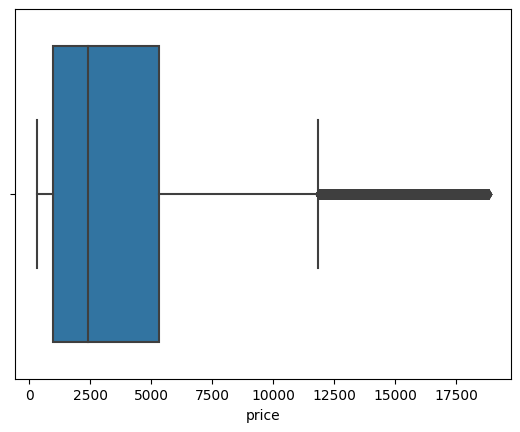

In [ ]:
sns.boxplot(x=df['price'])

<Axes: xlabel='table'>

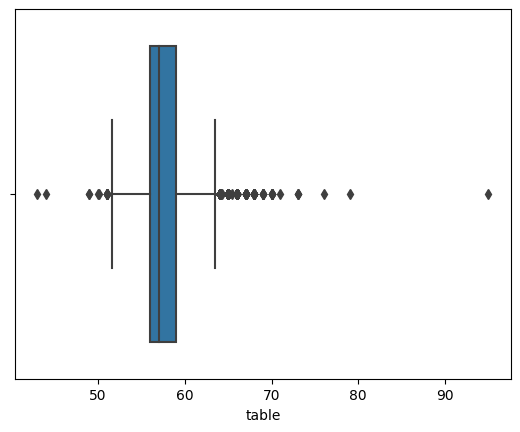

In [ ]:
sns.boxplot(x=df['table'])

<Axes: xlabel='depth percentage'>

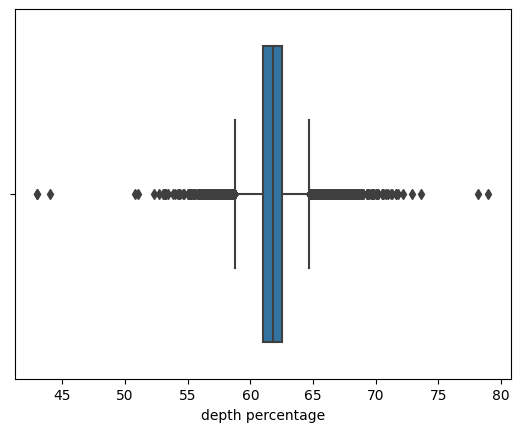

In [ ]:
sns.boxplot(x=df['depth percentage'])

<Axes: xlabel='length'>

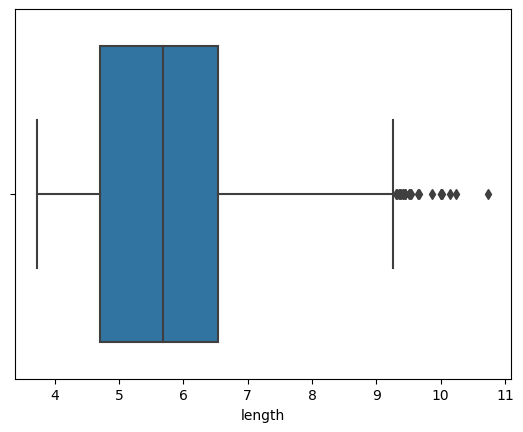

In [ ]:
sns.boxplot(x=df['length'])

<Axes: xlabel='width'>

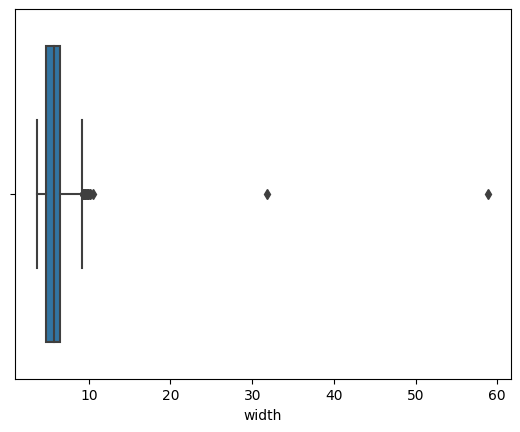

In [ ]:
sns.boxplot(x=df['width'])

<Axes: xlabel='depth'>

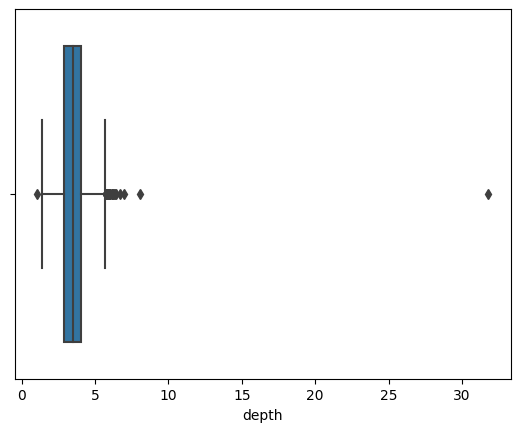

In [ ]:
sns.boxplot(x=df['depth'])

In [ ]:
Q1 = df.quantile(0.25) # Верхний квартиль
Q3 = df.quantile(0.75) # Нижний квартиль
IQR = Q3 - Q1 # Межквартильный размах
print(IQR)

carat                  0.64
depth percentage       1.50
table                  3.00
price               4363.00
length                 1.83
width                  1.81
depth                  1.12
dtype: float64


<ipython-input-30-019dd134b3c9>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25) # Верхний квартиль
<ipython-input-30-019dd134b3c9>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75) # Нижний квартиль


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # удаление выбросов, т.е. значений за пределами Q1 - 1.5 * IQR и Q3 + 1.5 * IQR
df.shape

<ipython-input-31-0d4f465a00e4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # удаление выбросов, т.е. значений за пределами Q1 - 1.5 * IQR и Q3 + 1.5 * IQR


(42935, 10)

Как видно из вышеприведенного, 5774 строки были пропущены, что не является удалением всех выбросов, но тем не менее, выбросов было более 100 и примерно 11% от всех значений.



---



## 9. Построение графиков различных характеристик относительно друг друга (разброс), относительно частоты (гистограмма)

### Гистограммы

В данном случае гистограмма показывает количество бриллиантов в зависимости от качества огранки, чистоты и цвета.

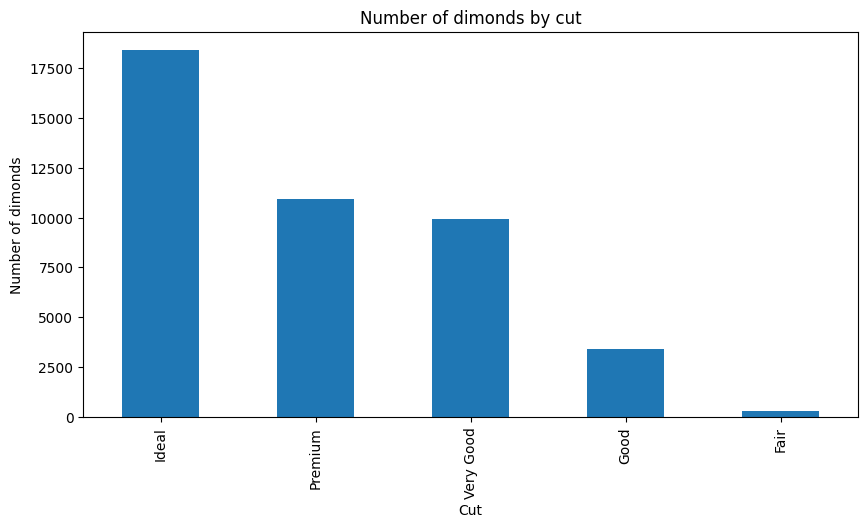

In [ ]:
df.cut.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of dimonds by cut")
plt.ylabel('Number of dimonds')
plt.xlabel('Cut');

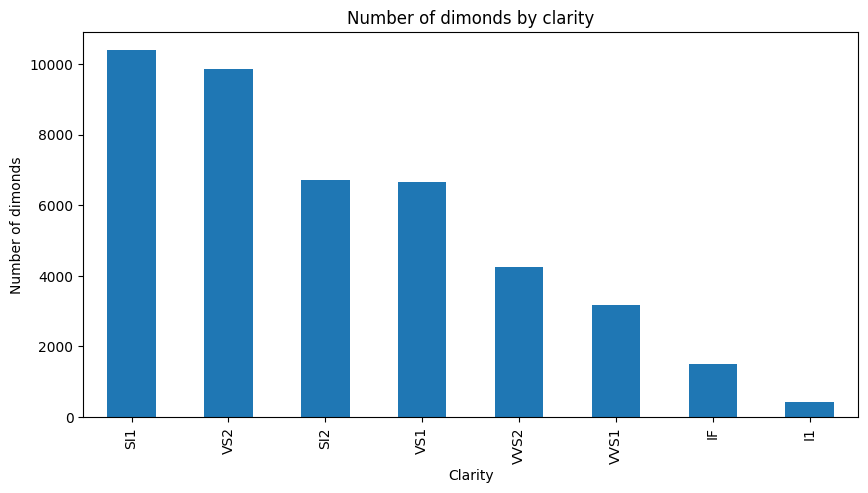

In [ ]:
df.clarity.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of dimonds by clarity")
plt.ylabel('Number of dimonds')
plt.xlabel('Clarity');

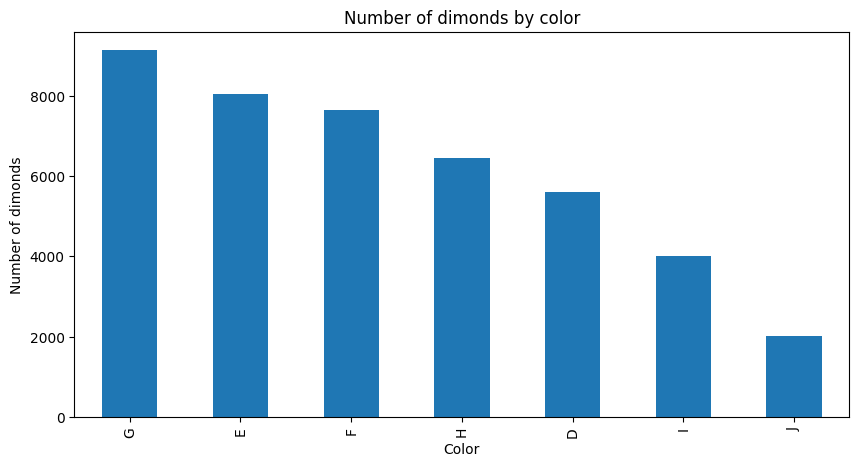

In [ ]:
df.color.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of dimonds by color")
plt.ylabel('Number of dimonds')
plt.xlabel('Color');

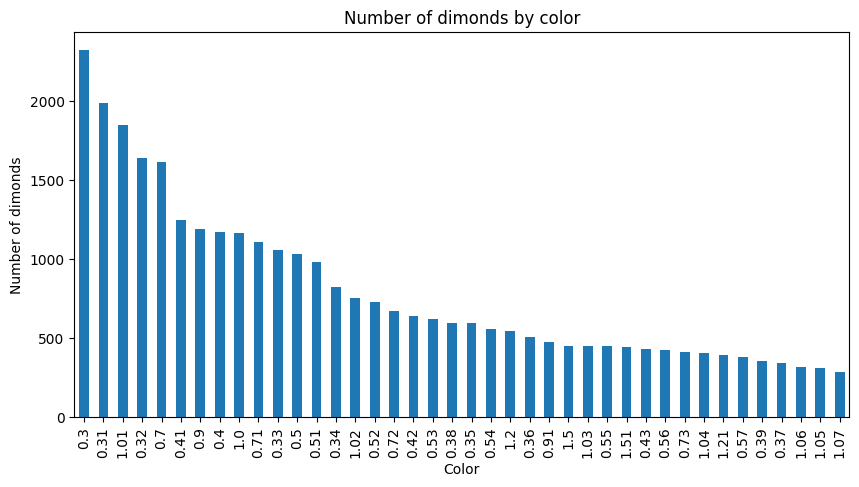

In [ ]:
df.carat.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of dimonds by color")
plt.ylabel('Number of dimonds')
plt.xlabel('Color');

### Тепловые карты

На приведенной ниже тепловой карте видно, что ценовая характеристика не связана с процентом глубины и процентом ширины бриллианта, но в наибольшей степени коррелирует с его весом в каратах.

<ipython-input-36-a44b43776930>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,carat,depth percentage,table,price,length,width,depth
carat,1.000000,0.035460,0.187357,0.922761,0.986295,0.985450,0.985007
depth percentage,0.035460,1.000000,-0.240933,0.005485,-0.010913,-0.012619,0.092271
table,0.187357,-0.240933,1.000000,0.137115,0.186432,0.180969,0.159101
price,0.922761,0.005485,0.137115,1.000000,0.899884,0.901013,0.896512
length,0.986295,-0.010913,0.186432,0.899884,1.000000,0.998502,0.993261
width,0.985450,-0.012619,0.180969,0.901013,0.998502,1.000000,0.993080
depth,0.985007,0.092271,0.159101,0.896512,0.993261,0.993080,1.000000


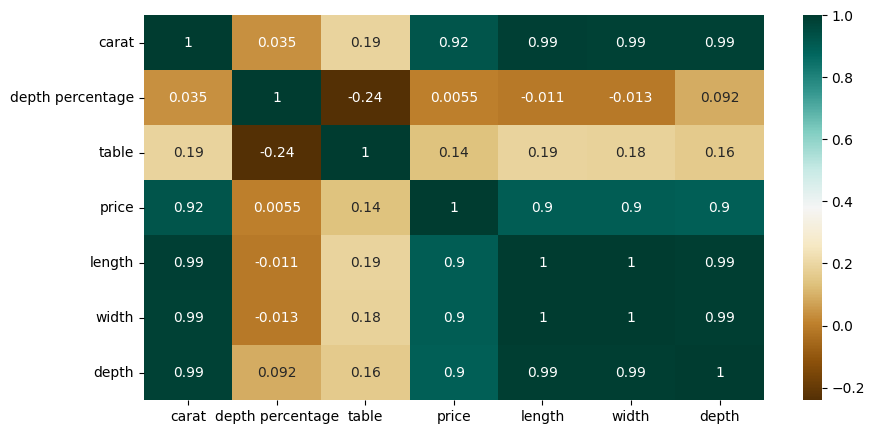

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Диаграмма рассеяния

Здесь диаграммы рассеяния построены между весом в каратах и ценой, а также между ней и процентом глубины. В первом случае на графике можно легко отобразить линию тренда, в отличае от второго, где корреляция между двумя переменными отсутствует.

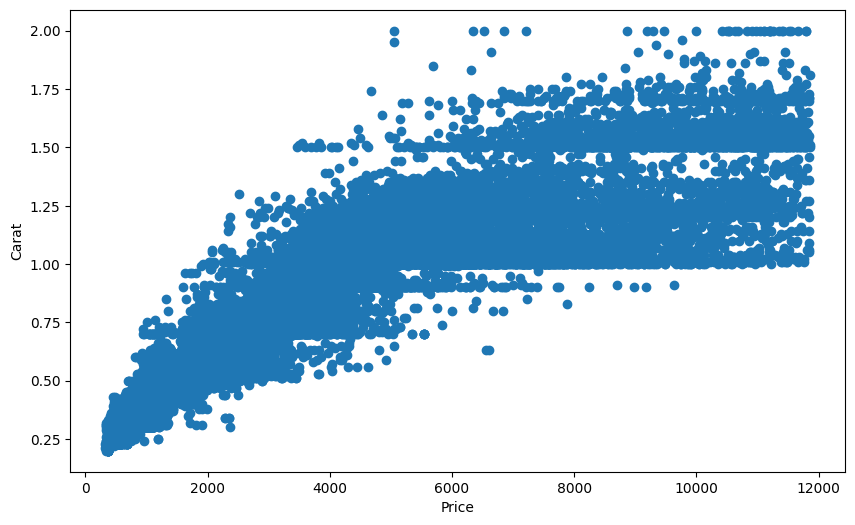

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['price'], df['carat'])
ax.set_ylabel('Carat')
ax.set_xlabel('Price')
plt.show()

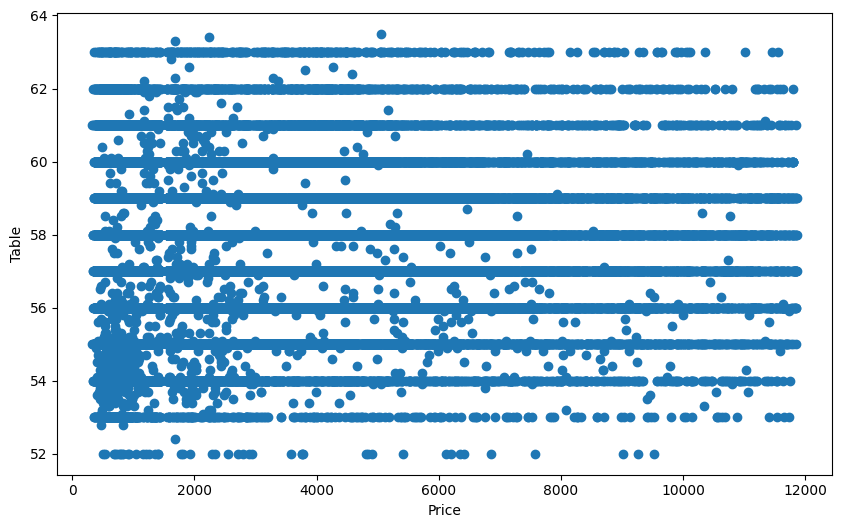

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['price'], df['table'])
ax.set_ylabel('Table')
ax.set_xlabel('Price')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df.to_csv ('/content/diamonds_clear.csv', index= False )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
